In [2]:
import numpy as np
from scipy.signal import convolve2d
from imageio import imread
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-ba50183f86c8>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
# read image from a url
taj_mahal = imread('https://pad.mymovies.it/cinemanews/2021/176621/coverlg_home.jpg')
# check size
print(taj_mahal.shape)

<ipython-input-3-9daf32cf176e>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  taj_mahal = imread('https://pad.mymovies.it/cinemanews/2021/176621/coverlg_home.jpg')


(720, 1280, 3)


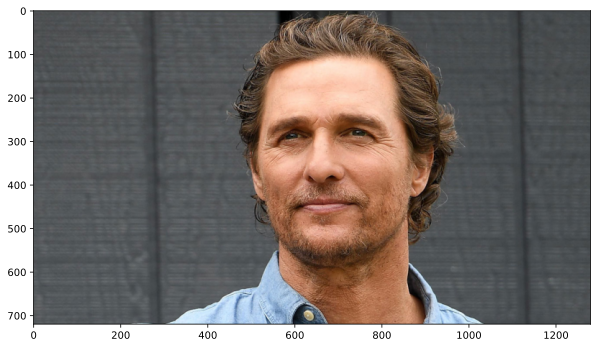

In [4]:
fig = plt.figure(figsize = (10,6))
plt.imshow(taj_mahal)

In [5]:
# # transform the 3-channel image to a 2-channel image
taj_mahal = np.mean(taj_mahal, axis = 2)
taj_mahal = taj_mahal/ np.max(taj_mahal)
print(taj_mahal.shape)

(720, 1280)


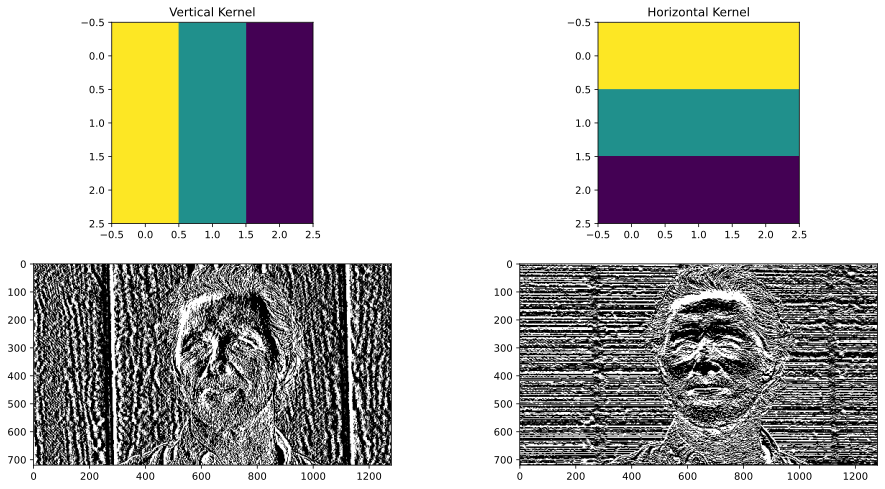

In [6]:
# hand craft the two convolution kernels
# Vertical Kernel
VK = np.array ([[1, 0, -1],
                [1, 0, -1],
                [1, 0, -1]])

# Horizontal Kernel
HK = np.array ([[1, 1, 1],
                [0, 0, 0],
                [-1,-1,-1]])

fig, ax = plt.subplots(2, 2, figsize = (16, 8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical Kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal Kernel')

# To perform the convolution
convres = convolve2d(taj_mahal, VK, mode = 'same')
ax[1,0].imshow(convres, cmap = 'gray', vmin = 0, vmax = 0.01)
convres = convolve2d(taj_mahal, HK, mode ='same')
ax[1,1].imshow(convres, cmap = 'gray', vmin = 0, vmax = 0.01)


In [7]:
import torch
import torch.nn.functional as F

In [11]:
VK_t = torch.tensor(VK).view(1, 1, 3, 3).double()
HK_t = torch.tensor(HK).view(1, 1, 3, 3).double()
taj_mahal_t = torch.tensor(taj_mahal).view(1, 1, taj_mahal.shape[0], taj_mahal.shape[1])

print(VK_t.shape)
print(HK_t.shape)
print(taj_mahal_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 720, 1280])


In [12]:
C = F.conv2d(taj_mahal_t, VK_t)
print(C.shape)

torch.Size([1, 1, 718, 1278])


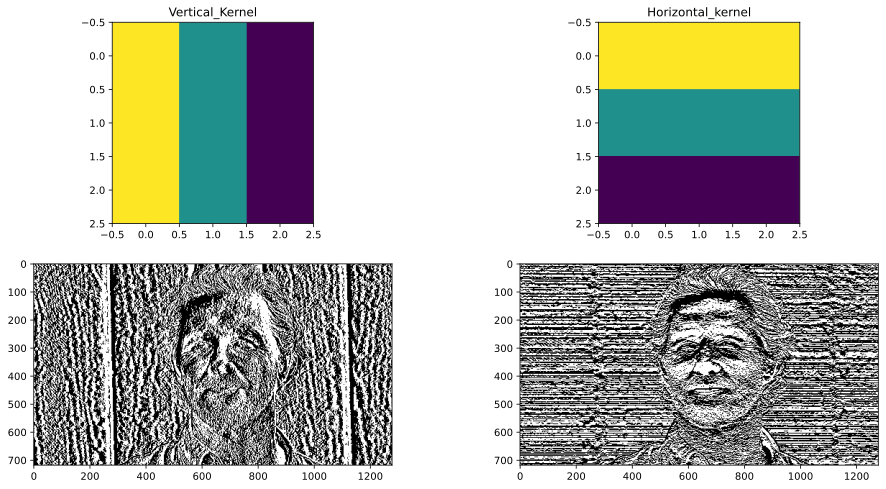

In [13]:
fig, ax = plt.subplots (2, 2, figsize = (16,8))

ax[0,0].imshow(VK)
ax[0,0]. set_title('Vertical_Kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title("Horizontal_kernel")

convres = F.conv2d(taj_mahal_t, VK_t)
img = torch.squeeze(convres.detach())
ax[1,0].imshow (img, cmap = 'gray', vmin = 0, vmax = 0.001)

convres = F.conv2d(taj_mahal_t, HK_t)
img = torch.squeeze(convres.detach())
ax[1,1].imshow (img, cmap = 'gray', vmin = 0, vmax = 0.001)

plt.show()

In [14]:
import torch
import torch.nn as nn

In [15]:
#parameters
poolsize = 3
stride = 3
p2 = nn.MaxPool2d(poolsize, stride)
p3 = nn.MaxPool3d(poolsize, stride)

print(p2)
print(p3)

MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)


In [17]:
img2 = torch.randn(1, 1, 30, 30)
img3 = torch.randn(1, 3, 30, 30)

img2pool2 = p2(img2)
print(f'2D image and 2D pooling : {img2pool2.shape}')

img3pool3 = p3(img3)
print(f'3D image and 3D pooling : {img3pool3.shape}')

2D image and 2D pooling : torch.Size([1, 1, 10, 10])
3D image and 3D pooling : torch.Size([1, 1, 10, 10])
